## 주요 내용

* [일반 검색](#1.일반-검색)
* [논리값 검색](#2.논리값-검색)
* [슬라이스 검색](#3.슬라이스-검색)
* [칼럼 추가 및 변경](#4.칼럼-추가-및-변경)

In [1]:
import pandas as pd
import numpy as np


In [2]:
pd.__version__

'0.22.0'

# DataFrame

    . 행과 열에 레이블을 가진 2차원 데이터
    . 열마다 다른 형태를 가질 수 있음
    . 테이블 형 데이터에 대해 불러오기, 데이터 쓰기가 가능
    . 데이터프레임끼리 여러 가지 조건을 사용한 결합 처리가 가능
    . 크로스 집계가 가능

# 1.일반 검색

    . 파이썬 검색처럼 인덱싱 검색과 슬라이스 검색이 가능하다.

    . 데이터 프레임은 열단위로 구성되어 있으므로 기본적 인덱싱을 사용하면 열단위로 조회가 된다.
    . 일반적인 검색은 __getitem__ 을 이용해서 처리하므로 하나의 값만 받아서 검색을 한다.
        

####  하나의 파일을 읽는다

In [3]:
anime = pd.read_csv("./anime/anime.csv",encoding="utf-8")

###  __getitem__ 은 대괄호 연산([ ]) 을 처리하는 기준

#### 리스트나 딕셔너리 연산 알아보기

In [4]:
help(list.__getitem__)

Help on method_descriptor:

__getitem__(...)
    x.__getitem__(y) <==> x[y]



In [5]:
l = list([1,2,3,4]) 

print(l[0])

1


In [6]:
help(dict.__getitem__)

Help on method_descriptor:

__getitem__(...)
    x.__getitem__(y) <==> x[y]



In [7]:
d = dict([('a',1),('b',2)])

print(d['a'])

1


### 하나의 열을  조회

       . 인덱싱으로 읽으면 열단위로 가져온다.
       . 조회된 결과는 Series로 처리된다.

####  데이터프레임도 내부 검색을 대괄호([ ]) 연산을 사용한다

In [8]:
help(anime.__getitem__)

Help on method __getitem__ in module pandas.core.frame:

__getitem__(key) method of pandas.core.frame.DataFrame instance



#### 파일을 읽고 처리하면 기본적인 인덱스가 없다.

In [9]:
anime.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

#### 위에서 읽은 파일이 데이터프레임을 대괄호 검색으로 처리
      . 칼럼 정보를 넣어서 읽는다.

In [10]:
anime['anime_id'].head()

0    32281
1     5114
2    28977
3     9253
4     9969
Name: anime_id, dtype: int64

In [11]:
anime.__getitem__('anime_id').head()

0    32281
1     5114
2    28977
3     9253
4     9969
Name: anime_id, dtype: int64

#### 칼럼을 하나 조회하면 Series가 나온다.

In [12]:
type(anime['anime_id'])

pandas.core.series.Series

In [13]:
type(anime.__getitem__('anime_id'))

pandas.core.series.Series

## 특정 열을 리스트로 조회

      . 필요한 열에 대한 열 이름을 리스트에 반드시 넣어서 검색
      . 리스트를 넣어서 검색하면 데이터프레임으로 결과를 보여준다.
      

In [14]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

#### 하나의 열을 조회할 때 리스트에 칼럼을 넣으면 데이터 프레임으로 나온다.

In [15]:
anime[["anime_id"]].head()

anime_id
0     32281
1      5114
2     28977
3      9253
4      9969

#### __getitem__ 내에도 리스트로 넣어도 처리하게 된다. 

      . 데이터 프레임 등에서는 인덱싱 처리가 확대되었다

In [16]:
anime.__getitem__(["anime_id"]).head()

anime_id
0     32281
1      5114
2     28977
3      9253
4      9969

In [17]:
type(anime[["anime_id"]])

pandas.core.frame.DataFrame

In [18]:
type(anime.__getitem__(["anime_id"]))

pandas.core.frame.DataFrame

#### 여러 개의 열 

      . 리스트 내에 여러 칼럼을 넣으면 데이터 프레임에 여러 칼럼이 들어온다.

In [19]:
anime[["anime_id","rating"]].head()

anime_id  rating
0     32281    9.37
1      5114    9.26
2     28977    9.25
3      9253    9.17
4      9969    9.16

In [20]:
anime.__getitem__(["anime_id","rating"]).head()

anime_id  rating
0     32281    9.37
1      5114    9.26
2     28977    9.25
3      9253    9.17
4      9969    9.16

#### 별도로 칼럼 정보를 구성해서 변수에 할당하고 조회

In [21]:
cols = ["anime_id","rating"]

In [22]:
anime[cols].head()

anime_id  rating
0     32281    9.37
1      5114    9.26
2     28977    9.25
3      9253    9.17
4      9969    9.16

In [23]:
anime.__getitem__(cols).head()

anime_id  rating
0     32281    9.37
1      5114    9.26
2     28977    9.25
3      9253    9.17
4      9969    9.16

###  인덱서를 이용해서 행으로 조회

      . 데이터 프레임은 기본으로 열단위 처리를 위해 만들어져 있다.
      . 행단위와 행과 열을 동시에 처리해서 검색할 수 있도록 인덱서를 제공한다.
      . 인덱서는 loc, iloc 이 있으면 행을 기준으로 데이터프레임을 검색할 수 있다. 
      

####  칼럼 정보를 조회한다

In [24]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

#### 인덱서는 첫번째는 행을 검색하고 두번째는 열을 검색한다.
 
     . 열을 접근하려면 행을 모두 읽게다는 슬라이스를 표시하고 캄럼명을 명기해야 한다.
     
     . loc는 명시적인 인덱스나 칼럼을 사용해서 조회가 가능하다.
     

In [25]:
anime.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

#### 인덱서는 별도의 객체이고 내부의 데이터를 행과 열을 가지고 검색을 할 수 있다.

In [26]:
anime.loc

In [27]:
type(anime.loc)

pandas.core.indexing._LocIndexer

In [28]:
anime.iloc

In [29]:
type(anime.iloc)

pandas.core.indexing._iLocIndexer

#### 인데스 정보를 이용해서 처리 

      . 인덱서 내에도 __getitem__ 메소드가 만들어져 있다.
      

In [30]:
for i in dir(anime.loc) : 
    print(i,end=',  ') if i.startswith("_") else _

__call__,  __class__,  __delattr__,  __dict__,  __dir__,  __doc__,  __eq__,  __format__,  __ge__,  __getattribute__,  __getitem__,  __gt__,  __hash__,  __init__,  __init_subclass__,  __iter__,  __le__,  __lt__,  __module__,  __ne__,  __new__,  __reduce__,  __reduce_ex__,  __repr__,  __setattr__,  __setitem__,  __sizeof__,  __str__,  __subclasshook__,  __weakref__,  _align_frame,  _align_panel,  _align_series,  _convert_for_reindex,  _convert_range,  _convert_scalar_indexer,  _convert_slice_indexer,  _convert_to_indexer,  _convert_tuple,  _exception,  _get_label,  _get_loc,  _get_partial_string_timestamp_match_key,  _get_setitem_indexer,  _get_slice_axis,  _getbool_axis,  _getitem_axis,  _getitem_iterable,  _getitem_lowerdim,  _getitem_nested_tuple,  _getitem_scalar,  _getitem_tuple,  _handle_lowerdim_multi_index_axis0,  _has_valid_positional_setitem_indexer,  _has_valid_setitem_indexer,  _has_valid_tuple,  _has_valid_type,  _is_nested_tuple_indexer,  _is_scalar_access,  _multi_take,  _

#### 인덱서를 사용한 데이터 검색

    . 첫번째 인자로 숫자를 넣으면 행 단위로 처리

In [31]:
anime.loc[0]

anime_id                                   32281
name                              Kimi no Na wa.
genre       Drama, Romance, School, Supernatural
type                                       Movie
episodes                                       1
rating                                      9.37
members                                   200630
Name: 0, dtype: object

In [32]:
anime.loc.__getitem__(0)

anime_id                                   32281
name                              Kimi no Na wa.
genre       Drama, Romance, School, Supernatural
type                                       Movie
episodes                                       1
rating                                      9.37
members                                   200630
Name: 0, dtype: object

#### 행의 인덱스 값을 리스트로 조회하면 데이터 프레임으로 출력한다.

      . 내부의 조회 값을 리스트로 넣으면 행 내의 인덱스 값으로 조회

In [33]:
anime.loc[[0,1]]

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   

   members  
0   200630  
1   793665

In [34]:
anime.loc.__getitem__([0,1])

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   

   members  
0   200630  
1   793665

###  행과 열을 넣고 인덱서 조회

####  행의 위치에 슬라이싱을 사용하면 행을 전부 조회하고 칼럼을 하나 넣으면 시리즈로 조회

In [35]:
anime.loc[:,'name'].head()

0                      Kimi no Na wa.
1    Fullmetal Alchemist: Brotherhood
2                            Gintama°
3                         Steins;Gate
4                       Gintama&#039;
Name: name, dtype: object

####  인덱서도 하나의 키만 받으므로 내부적 처리를 위해 다양한 메소드를 제공하고 있다.

In [36]:
help(anime.loc.__getitem__)

Help on method __getitem__ in module pandas.core.indexing:

__getitem__(key) method of pandas.core.indexing._LocIndexer instance



In [37]:
dir(anime.loc)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_align_frame',
 '_align_panel',
 '_align_series',
 '_convert_for_reindex',
 '_convert_range',
 '_convert_scalar_indexer',
 '_convert_slice_indexer',
 '_convert_to_indexer',
 '_convert_tuple',
 '_exception',
 '_get_label',
 '_get_loc',
 '_get_partial_string_timestamp_match_key',
 '_get_setitem_indexer',
 '_get_slice_axis',
 '_getbool_axis',
 '_getitem_axis',
 '_getitem_iterable',
 '_getitem_lowerdim',
 '_getitem_nested_tuple',
 '_getitem_scalar',
 '_getitem_tuple',
 '_handle_lowerdim_multi_index_axis0',
 '_has_valid_positional_setitem_indexer',
 '_has_valid_setitem

#### 슬라이드를 이용해서 검색해 오기

      . _get_slice_axis는 보호 메소드이지만 호출이 가능하다.
      . 실제 실행해서 처리하면 데이터 프레임을 슬라이스로 처리하기

In [38]:
anime.loc._get_slice_axis(slice(0,len(anime))).head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

#### 프레임에서 칼럼만 선택하기

In [39]:
type(anime.loc[:,'name'])

pandas.core.series.Series

In [40]:
anime.loc._get_slice_axis(slice(0,len(anime))).__getitem__('name').head()

0                      Kimi no Na wa.
1    Fullmetal Alchemist: Brotherhood
2                            Gintama°
3                         Steins;Gate
4                       Gintama&#039;
Name: name, dtype: object

#### 열의 위치에 리스트로 넣으면 두 개의 칼럼이 조회되므로 데이터 프레임으로 구성 

In [41]:
anime.loc[:,['name','genre']].head()

name  \
0                    Kimi no Na wa.   
1  Fullmetal Alchemist: Brotherhood   
2                          Gintama°   
3                       Steins;Gate   
4                     Gintama&#039;   

                                               genre  
0               Drama, Romance, School, Supernatural  
1  Action, Adventure, Drama, Fantasy, Magic, Mili...  
2  Action, Comedy, Historical, Parody, Samurai, S...  
3                                   Sci-Fi, Thriller  
4  Action, Comedy, Historical, Parody, Samurai, S...

In [42]:
anime.loc._get_slice_axis(slice(0,len(anime))).__getitem__(['name','genre']).head()

name  \
0                    Kimi no Na wa.   
1  Fullmetal Alchemist: Brotherhood   
2                          Gintama°   
3                       Steins;Gate   
4                     Gintama&#039;   

                                               genre  
0               Drama, Romance, School, Supernatural  
1  Action, Adventure, Drama, Fantasy, Magic, Mili...  
2  Action, Comedy, Historical, Parody, Samurai, S...  
3                                   Sci-Fi, Thriller  
4  Action, Comedy, Historical, Parody, Samurai, S...

#### 암묵적 인덱스인 숫자를 넣어서 처리하면 기본으로 하나의 행을 시리즈로 표시한다.

      . iloc는 숫자로 된 암묵적 인덱스를 사용한다.
      

In [43]:
anime.iloc[0]

anime_id                                   32281
name                              Kimi no Na wa.
genre       Drama, Romance, School, Supernatural
type                                       Movie
episodes                                       1
rating                                      9.37
members                                   200630
Name: 0, dtype: object

In [44]:
type(anime.iloc[0])

pandas.core.series.Series

#### 암묵적인 행을 리스트로 처리하면 결과는 데이터 프레임으로 표시한다.

      . 리스트 내에 숫자로 넣으면 행을 기준으로 인덱스를 처리한다.
      . 이때는 데이터 프레임으로 처리한다.
      

In [45]:
anime.iloc[[0,1]]

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   

   members  
0   200630  
1   793665

# 2.논리값 검색

    . 논리값이 true 인 경우만 추출이 가능하다. 
    . 필터링 처리처럼 조건이 맞는 경우에 한해서만 출출된다.

### 하나의 칼럼을 조회하고 논리식 적용

    . 시리즈 타입이므르로 논리 결과값도 시리즈로 나온다.

In [46]:
(anime['rating'] > 9.30).head()

0     True
1    False
2    False
3    False
4    False
Name: rating, dtype: bool

#### True 값이 개수를 확인해서 실제 검색해보면 그 값이 맞는 지를 확인한다.

In [47]:
(anime['rating'] > 9.30).sum()

5

#### 데이터 프레임에 논리식의 결과를 조회하면 True 인 결과만 검색

In [48]:
anime[anime['rating'] > 9.30]

anime_id                                     name  \
0        32281                           Kimi no Na wa.   
8474     33607                             Kahei no Umi   
8985     23005                         Mogura no Motoro   
9785     30120              Spoon-hime no Swing Kitchen   
9846     33662  Taka no Tsume 8: Yoshida-kun no X-Files   

                                     genre   type episodes  rating  members  
0     Drama, Romance, School, Supernatural  Movie        1    9.37   200630  
8474                            Historical  Movie        1    9.33       44  
8985                         Slice of Life  Movie        1    9.50       62  
9785                       Adventure, Kids     TV  Unknown    9.60       47  
9846                        Comedy, Parody  Movie        1   10.00       13

### 칼럼 내부의 내부 값에 대한 분포 확인

      . 하나의 칼럼은 Series 클래스 이므로 속한 값이 유일한 값인지 각 유일한 값이 갯수가 어떻게 되었는 지를 확인한다.
      

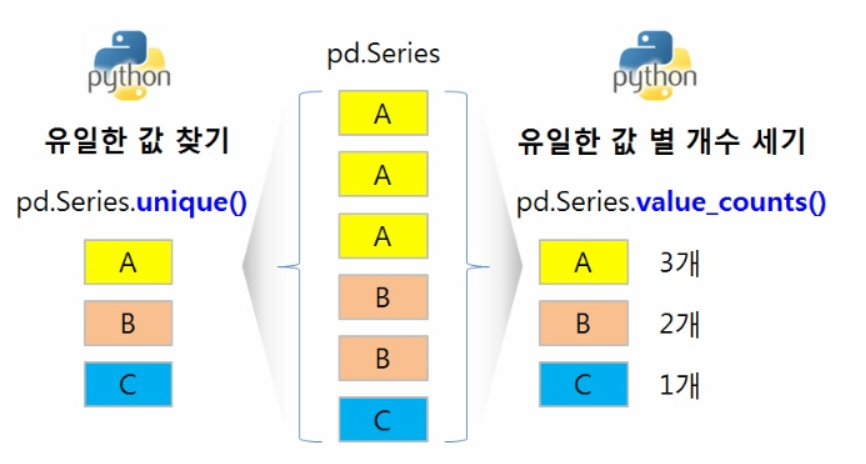

In [49]:
from  IPython.display import Image

Image("valuecounts_pic.png")

#### 하나의 칼럼에 값이 분포를 확인해 본다.

In [50]:
anime['episodes'].value_counts().head()

1     5149
12     666
13     532
2      511
26     504
Name: episodes, dtype: int64

#### 각 분포에 대한 상대비율로 표시한다.

      . normalize=True 를 사용하면 상대비율로 표시
      

In [51]:
anime['episodes'].value_counts(normalize=True).head()

1     0.491036
12    0.063513
13    0.050734
2     0.048732
26    0.048064
Name: episodes, dtype: float64

###  유일한 값은 ndarray 값을 결과로 제공한다

In [52]:
anime['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '243', '193',
       '65', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

###  다중조건의 블리언 처리

      . & 와 | , ~ 을 이용해서 논리식을 연결해서 처리 가능하다. and와 or, not은 검색에서는 사용되지 않는다.

      . 각 논리식을 괄호로 반드시 묶어서 처리해야 한다.
      

#### 조건식을 넣어서 조회 

In [53]:
anime[(anime['rating'] > 9.30) & (anime['members'] > 50)]

anime_id              name                                 genre   type  \
0        32281    Kimi no Na wa.  Drama, Romance, School, Supernatural  Movie   
8985     23005  Mogura no Motoro                         Slice of Life  Movie   

     episodes  rating  members  
0           1    9.37   200630  
8985        1    9.50       62

####  열별로 추출

In [54]:
anime[['anime_id','name','genre']].head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre  
0               Drama, Romance, School, Supernatural  
1  Action, Adventure, Drama, Fantasy, Magic, Mili...  
2  Action, Comedy, Historical, Parody, Samurai, S...  
3                                   Sci-Fi, Thriller  
4  Action, Comedy, Historical, Parody, Samurai, S...

# 3.슬라이스 검색

    . 특정 부분을 검색할 때는 슬라이스를 사용한다.
    . 판다스 객체들은 숫자 나 문자 등의 인덱스나 칼럼도 다 가능하다.
    

### 기본 슬라이스를 처리해도 행단위로 처리된다.

     . 들어가는 값이 숫자로만 처리된다.

#### 기본 검색에 숫자로 슬라이스를 하면 행단위로 처리한다.

In [55]:
anime[0:2]

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   

   members  
0   200630  
1   793665

#### slice 인스턴스로 처리

In [56]:
s = slice(0,2)

In [57]:
anime[s]

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   

   members  
0   200630  
1   793665

#### 기본 index 구문에서는 행과 열을 분리해서 처리할 수 없다.

    . 이런 경우는 인덱서를 이용해서 처리해야 한다.

In [58]:
anime[:, ['amime_id']]

TypeError: unhashable type: 'slice'

###  indexer를 이용한 다양한 슬라이싱 검색 방법을 알아본다.

    . 첫번째는 행단위로 처리하고 두번째는 열단위로 처리한다.
    . 첫번째를 행 전부를 처리하려면 : 로 표시

#### 행단위로만 슬라이싱 처리

    . loc이 처음은 행에 대한 처리이다.

In [59]:
anime.loc[0 : 2]

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   

   members  
0   200630  
1   793665  
2   114262

#### iloc는 암묵적 인덱스로 처리 

     . 실제 내부적인 인덱스로 구성된다.
     . 문자열 인덱스일 때도 암묵적으로는 숫자 인덱스로 구성된다.
     

In [60]:
anime.iloc[0 : 2]

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   

   members  
0   200630  
1   793665

#### 열단위로 슬라이싱 처리

     인덱서는[행 , 열]로 처리가 가능하다.
       . 행과열에 슬라이스를 표시해서 처리도 가능하다.

In [61]:
anime.loc[:, 'anime_id':'type'].head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  
0               Drama, Romance, School, Supernatural  Movie  
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV  
2  Action, Comedy, Historical, Parody, Samurai, S...     TV  
3                                   Sci-Fi, Thriller     TV  
4  Action, Comedy, Historical, Parody, Samurai, S...     TV

In [62]:
anime.loc[:, ['anime_id']].head()

anime_id
0     32281
1      5114
2     28977
3      9253
4      9969

#### iloc를 이용할 때는 숫자 인덱스로만 처리하기

In [63]:
anime.iloc[0 : 2, 0:2]

anime_id                              name
0     32281                    Kimi no Na wa.
1      5114  Fullmetal Alchemist: Brotherhood

### 사전 순서 대로 처리하기

     .loc 속성으로 index이 이름을 가지고 검색도 가능하다.
        전체 이름을 모를때는 특정 문자까지만 입력해서 슬라이싱 처리도 가능하다.

In [64]:
college = pd.read_csv('./data/data/college.csv',index_col="INSTNM")

#### 행의 이름에 대해 약어를 주고 처리하면 일단 정렬이 되지 않아서 예외가 발생한다

In [65]:
college.loc['Sp':'Su']

KeyError: 'Sp'

### 정렬을 한 다음에 다시 조회하면 이름에 맞춰 출력한다.

In [66]:
college = college.sort_index()

#### label 기반으로 처리하는 loc 속성은 전체 이름이 들어오지 않아도 일부 이름으로도 검색해서 출력한다.

In [67]:
college.loc['Sp':'Su'].head()

CITY STABBR  HBCU  MENONLY  WOMENONLY  \
INSTNM                                                                      
Spa Tech Institute-Ipswich       Ipswich     MA   0.0      0.0        0.0   
Spa Tech Institute-Plymouth     Plymouth     MA   0.0      0.0        0.0   
Spa Tech Institute-Westboro     Westboro     MA   0.0      0.0        0.0   
Spa Tech Institute-Westbrook   Westbrook     ME   0.0      0.0        0.0   
Spalding University           Louisville     KY   0.0      0.0        0.0   

                              RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  \
INSTNM                                                                     
Spa Tech Institute-Ipswich           0       NaN       NaN           0.0   
Spa Tech Institute-Plymouth          0       NaN       NaN           0.0   
Spa Tech Institute-Westboro          0       NaN       NaN           0.0   
Spa Tech Institute-Westbrook         0       NaN       NaN           0.0   
Spalding University                  1     490.0     440.0           0.0   

                                UGDS         ...          UGDS_2MOR  UGDS_NRA  \
INSTNM                                       ...                                
Spa Tech Institute-Ipswich      37.0         ...             0.0000    0.0000   
Spa Tech Institute-Plymouth    153.0         ...             0.0000    0.0000   
Spa Tech Institute-Westboro     90.0         ...             0.0000    0.0000   
Spa Tech Institute-Westbrook   240.0         ...             0.0000    0.0000   
Spalding University           1227.0         ...             0.0302    0.0016   

                              UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                 
Spa Tech Institute-Ipswich       0.0541    0.4054         1   0.2656   
Spa Tech Institute-Plymouth      0.2484    0.3399         1   0.3716   
Spa Tech Institute-Westboro      0.0222    0.5778         1   0.3409   
Spa Tech Institute-Westbrook     0.0042    0.2542         1   0.4350   
Spalding University              0.0326    0.2502         1   0.4442   

                              PCTFLOAN  UG25ABV  MD_EARN_WNE_P10  \
INSTNM                                                             
Spa Tech Institute-Ipswich      0.3906   0.7907            21500   
Spa Tech Institute-Plymouth     0.4266   0.6250            21500   
Spa Tech Institute-Westboro     0.4545   0.6882            21500   
Spa Tech Institute-Westbrook    0.5093   0.5224            21500   
Spalding University             0.6725   0.3764            41700   

                              GRAD_DEBT_MDN_SUPP  
INSTNM                                            
Spa Tech Institute-Ipswich                  6333  
Spa Tech Institute-Plymouth                 6333  
Spa Tech Institute-Westboro                 6333  
Spa Tech Institute-Westbrook                6333  
Spalding University                        25000  

[5 rows x 26 columns]

#### 학교명에 대해 첫번째 글자로 추출할 경우 
    . 두번째 문자 바로 전 알파벳까지 인식해서 처리한다. 

In [68]:
college.loc['D':'S'].tail()

CITY STABBR  HBCU  \
INSTNM                                                                    
Rust College                                 Holly Springs     MS   1.0   
Rutgers University-Camden                           Camden     NJ   0.0   
Rutgers University-New Brunswick             New Brunswick     NJ   0.0   
Rutgers University-Newark                           Newark     NJ   0.0   
Ryder Memorial School for Practical Nursing        Humacao     PR   0.0   

                                             MENONLY  WOMENONLY  RELAFFIL  \
INSTNM                                                                      
Rust College                                     0.0        0.0         1   
Rutgers University-Camden                        0.0        0.0         0   
Rutgers University-New Brunswick                 0.0        0.0         0   
Rutgers University-Newark                        0.0        0.0         0   
Ryder Memorial School for Practical Nursing      0.0        0.0         1   

                                             SATVRMID  SATMTMID  DISTANCEONLY  \
INSTNM                                                                          
Rust College                                      NaN       NaN           0.0   
Rutgers University-Camden                       505.0     520.0           0.0   
Rutgers University-New Brunswick                580.0     635.0           0.0   
Rutgers University-Newark                       495.0     540.0           0.0   
Ryder Memorial School for Practical Nursing       NaN       NaN           0.0   

                                                UGDS         ...          \
INSTNM                                                       ...           
Rust College                                   963.0         ...           
Rutgers University-Camden                     4801.0         ...           
Rutgers University-New Brunswick             34094.0         ...           
Rutgers University-Newark                     6841.0         ...           
Ryder Memorial School for Practical Nursing     14.0         ...           

                                             UGDS_2MOR  UGDS_NRA  UGDS_UNKN  \
INSTNM                                                                        
Rust College                                    0.0000    0.0343     0.0000   
Rutgers University-Camden                       0.0362    0.0144     0.0260   
Rutgers University-New Brunswick                0.0329    0.0555     0.0174   
Rutgers University-Newark                       0.0285    0.0304     0.0212   
Ryder Memorial School for Practical Nursing     0.0000    0.0000     0.0000   

                                             PPTUG_EF  CURROPER  PCTPELL  \
INSTNM                                                                     
Rust College                                   0.0571         1   0.8818   
Rutgers University-Camden                      0.1704         1   0.4810   
Rutgers University-New Brunswick               0.0534         1   0.2996   
Rutgers University-Newark                      0.1329         1   0.5185   
Ryder Memorial School for Practical Nursing    0.0000         0   1.0000   

                                             PCTFLOAN  UG25ABV  \
INSTNM                                                           
Rust College                                   0.8720   0.1302   
Rutgers University-Camden                      0.7166   0.3059   
Rutgers University-New Brunswick               0.5236   0.0886   
Rutgers University-Newark                      0.5734   0.2213   
Ryder Memorial School for Practical Nursing    0.0000   0.0714   

                                               MD_EARN_WNE_P10  \
INSTNM                                                           
Rust College                                             22700   
Rutgers University-Camden                                54500   
Rutgers University-New Brunswick                         54500   
Rutgers